In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from pandas_profiling import ProfileReport
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 


In [2]:
train = pd.read_csv('ads_train.csv')

In [4]:
train.shape

(38209, 15)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38209 entries, 0 to 38208
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           38209 non-null  int64  
 1   isbuyer              38209 non-null  int64  
 2   buy_freq             1620 non-null   float64
 3   visit_freq           38209 non-null  int64  
 4   buy_interval         38209 non-null  float64
 5   sv_interval          38209 non-null  float64
 6   expected_time_buy    38209 non-null  float64
 7   expected_time_visit  38209 non-null  float64
 8   last_buy             38209 non-null  int64  
 9   last_visit           38209 non-null  int64  
 10  multiple_buy         38209 non-null  int64  
 11  multiple_visit       38209 non-null  int64  
 12  uniq_urls            38209 non-null  int64  
 13  num_checkins         38209 non-null  int64  
 14  y_buy                38209 non-null  int64  
dtypes: float64(5), int64(10)
memory usag

In [6]:
train.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
train.columns

Index(['isbuyer', 'buy_freq', 'visit_freq', 'buy_interval', 'sv_interval',
       'expected_time_buy', 'expected_time_visit', 'last_buy', 'last_visit',
       'multiple_buy', 'multiple_visit', 'uniq_urls', 'num_checkins', 'y_buy'],
      dtype='object')

In [8]:
#Replace NA with 0 in Buy_Freq:
train.buy_freq.fillna(0, inplace=True)
train.isnull().sum()

isbuyer                0
buy_freq               0
visit_freq             0
buy_interval           0
sv_interval            0
expected_time_buy      0
expected_time_visit    0
last_buy               0
last_visit             0
multiple_buy           0
multiple_visit         0
uniq_urls              0
num_checkins           0
y_buy                  0
dtype: int64

In [9]:
train.describe().transpose()[['min','max','mean']]

,min,max,mean
isbuyer,0.0000,1.00000,0.042398
buy_freq,0.0000,15.00000,0.052553
visit_freq,0.0000,84.00000,1.868199
buy_interval,0.0000,174.62500,0.197411
sv_interval,0.0000,184.91670,5.862179
expected_time_buy,-181.9238,84.28571,-0.174376
expected_time_visit,-187.6156,91.40192,-10.136685
last_buy,0.0000,188.00000,64.657384
last_visit,0.0000,188.00000,64.657384
multiple_buy,0.0000,1.00000,0.005967


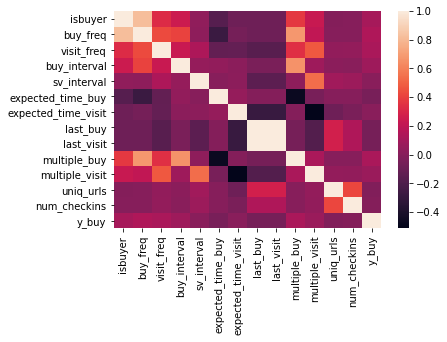

In [10]:
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

In [11]:
## spot the highly correlated variables with threshold = 0.9
columns = np.full((corrMatrix.shape[0],), True, dtype=bool)
for i in range(corrMatrix.shape[0]):
    for j in range(i+1, corrMatrix.shape[0]):
        if corrMatrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]

print(len(selected_columns))
print(selected_columns) # turn out, the removed variable is last_visit




13
Index(['isbuyer', 'buy_freq', 'visit_freq', 'buy_interval', 'sv_interval',
       'expected_time_buy', 'expected_time_visit', 'last_buy', 'multiple_buy',
       'multiple_visit', 'uniq_urls', 'num_checkins', 'y_buy'],
      dtype='object')


In [12]:
## Remove last_visit and keep last_buy:
train = train[selected_columns]
train.shape


(38209, 13)

Because the y_buy is a categorical value, I will chose Logistic Regression. There are many benefits of using Logistic Regression over Linear Regression or Multi Linear Regression, especially in this case

In [13]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 
from scipy import stats
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn import tree
#import graphviz

<AxesSubplot:>

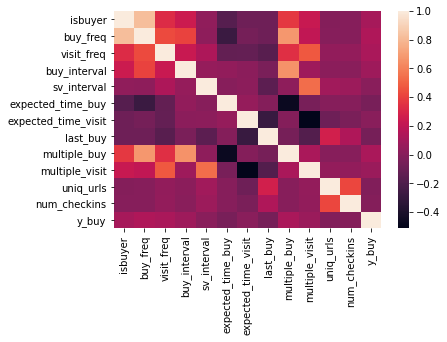

In [14]:
sns.heatmap((train.corr()), annot = False)

0    38037
1      172
Name: y_buy, dtype: int64


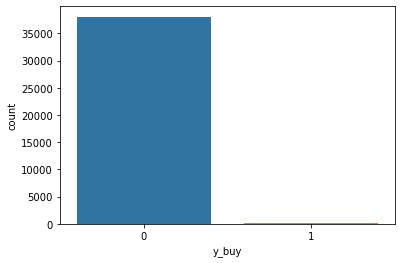

In [15]:
sns.countplot(x = 'y_buy', data =train)
print(train['y_buy'].value_counts())

In [16]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [17]:
cols = train.columns.tolist()
cols = [c for c in cols if c not in ["y_buy"]]
target = "y_buy"

In [18]:
#define X and Y
X = train[cols]
Y = train[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [20]:
print(X_under.shape)
print(Y_under.shape)
print(Y_under.value_counts())

(516, 12)
(516,)
0    344
1    172
Name: y_buy, dtype: int64


In [19]:
Y_under = pd.DataFrame(Y_under, columns = ['y_buy'])
Y_under.shape

(516, 1)

In [20]:
X_under = pd.DataFrame(X_under)
X_under.shape

(516, 12)

In [21]:
## Set the size for the figures:
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[30, 30])


<Figure size 1440x432 with 0 Axes>

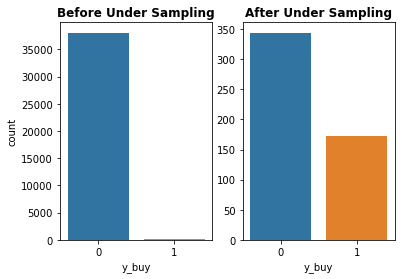

In [22]:
## Plot the figures:

ax = plt.subplot(gs[1]) # put this chart in 2nd place.
sns.countplot(x = "y_buy",data = Y_under, ax=ax) 
ax.set_title('After Under Sampling', fontsize=12, fontweight='bold')

ax2 = plt.subplot(gs[0])
sns.countplot(x = "y_buy", data = train, ax = ax2)
ax2.set_title('Before Under Sampling', fontsize=12, fontweight='bold') 

plt.show()

In [23]:
## Randomly split the training and test:

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.25, random_state=12345)

In [24]:
print("the shape of X_train: " + str(X_train.shape))
print("the shape of Y_train: " + str(y_train.shape))
print("the shape of x_test: " + str(X_test.shape))
print("the shape of y_test: " + str(y_test.shape))

the shape of X_train: (387, 12)
the shape of Y_train: (387, 1)
the shape of x_test: (129, 12)
the shape of y_test: (129, 1)


#### 1. OLS Model

In [25]:
linear = sm.OLS(y_train, X_train).fit()
print (linear.summary())

                                 OLS Regression Results                                
Dep. Variable:                  y_buy   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              34.35
Date:                Sun, 30 May 2021   Prob (F-statistic):                    3.47e-53
Time:                        18:09:10   Log-Likelihood:                         -183.84
No. Observations:                 387   AIC:                                      391.7
Df Residuals:                     375   BIC:                                      439.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [26]:
## Backward Selection for variables:
X_train_trim = X_train.drop(['buy_freq','visit_freq','buy_interval','expected_time_buy',\
                             'last_buy','multiple_buy','uniq_urls','num_checkins'], axis = 1)
linear2 = sm.OLS(y_train, X_train_trim).fit()
print(linear2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  y_buy   R-squared (uncentered):                   0.504
Model:                            OLS   Adj. R-squared (uncentered):              0.499
Method:                 Least Squares   F-statistic:                              97.37
Date:                Sun, 30 May 2021   Prob (F-statistic):                    4.37e-57
Time:                        18:09:10   Log-Likelihood:                         -191.58
No. Observations:                 387   AIC:                                      391.2
Df Residuals:                     383   BIC:                                      407.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [27]:
## Drop the variables for X_test also:
X_test_trim = X_test.drop(['buy_freq','visit_freq','buy_interval','expected_time_buy',\
                             'last_buy','multiple_buy','uniq_urls','num_checkins'], axis = 1)

#Set the threshold as 0.5:
y_pred_OLS = linear2.predict(X_test_trim)
y_pred_OLS = [ 0 if x < 0.5 else 1 for x in y_pred_OLS]

print(metrics.confusion_matrix(y_test, y_pred_OLS))
print ("Accuracy: " + str( metrics.accuracy_score(y_test, y_pred_OLS)*100)+" %")
print ("Precision: "+ str( metrics.precision_score(y_test, y_pred_OLS)*100) + " %")
print ( "Recall: "+ str( metrics.recall_score(y_test, y_pred_OLS)*100) +" %")


[[72  8]
 [21 28]]
Accuracy: 77.51937984496125 %
Precision: 77.77777777777779 %
Recall: 57.14285714285714 %


#### 2. Logit Model:

In [28]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [29]:
## Check VIF for Multicolinearity:
calc_vif(X_train)

,variables,VIF
0,isbuyer,2.495498
1,buy_freq,3.364893
2,visit_freq,3.209434
3,buy_interval,2.541184
4,sv_interval,1.885234
5,expected_time_buy,1.830691
6,expected_time_visit,1.686621
7,last_buy,2.530351
8,multiple_buy,5.104821
9,multiple_visit,4.000857


In [30]:
## Drop multiple_buy due to high multicolinearity with multiple_visit
X_train_trim2 = X_train.drop(['multiple_buy','multiple_visit'], axis = 1)
X_test_trim2 = X_test.drop(['multiple_buy','multiple_visit' ], axis = 1)
calc_vif(X_train_trim2)

,variables,VIF
0,isbuyer,2.100533
1,buy_freq,2.664020
2,visit_freq,2.390087
3,buy_interval,1.339589
4,sv_interval,1.177671
5,expected_time_buy,1.180358
6,expected_time_visit,1.268931
7,last_buy,2.437199
8,uniq_urls,3.932696
9,num_checkins,2.223735


In [31]:
## Try to build the Logit model:
logit = sm.Logit(y_train, X_train_trim2).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.424289
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  y_buy   No. Observations:                  387
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            9
Date:                Sun, 30 May 2021   Pseudo R-squ.:                  0.3214
Time:                        18:09:10   Log-Likelihood:                -164.20
converged:                       True   LL-Null:                       -241.96
Covariance Type:            nonrobust   LLR p-value:                 6.317e-29
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
isbuyer                -2.2939      2.126     -1.079      0.281      -6.461       1.873
b

In [32]:
## Drop the insignificant variable and keep only those significant:
X_train_logit = X_train_trim2[['visit_freq','expected_time_visit','last_buy','uniq_urls']]
X_test_logit = X_test_trim2[['visit_freq','expected_time_visit','last_buy','uniq_urls']]

## Build the Logit Model again with significant variables:
logit2 = sm.Logit(y_train, X_train_logit).fit()
print(logit2.summary())

Optimization terminated successfully.
         Current function value: 0.447235
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_buy   No. Observations:                  387
Model:                          Logit   Df Residuals:                      383
Method:                           MLE   Df Model:                            3
Date:                Sun, 30 May 2021   Pseudo R-squ.:                  0.2847
Time:                        18:09:10   Log-Likelihood:                -173.08
converged:                       True   LL-Null:                       -241.96
Covariance Type:            nonrobust   LLR p-value:                 1.148e-29
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
visit_freq              0.2237      0.045      4.922      0.000       0.135       0.313
ex

In [33]:
## Fit into the test set:
y_pred_logit = logit2.predict(X_test_logit)
y_pred_logit = [ 0 if x < 0.5 else 1 for x in y_pred_logit]
print(metrics.confusion_matrix(y_test, y_pred_logit))
print ("Accuracy: " + str( metrics.accuracy_score(y_test, y_pred_logit)*100)+" %")
print ("Precision: "+ str( metrics.precision_score(y_test, y_pred_logit)*100) + " %")
print ( "Recall: "+ str( metrics.recall_score(y_test, y_pred_logit)*100) +" %")

[[72  8]
 [19 30]]
Accuracy: 79.06976744186046 %
Precision: 78.94736842105263 %
Recall: 61.224489795918366 %


#### 3. Neutral Network

In [38]:
## Normalize the data first:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 


In [42]:
## Multi-layer perceptron classification - one hidden layer of 3 neurons
mlp = MLPClassifier(hidden_layer_sizes=(3), max_iter=1000)  
mlp.fit(X_train, y_train)  

  
## predict test set 
y_pred_NN = mlp.predict(X_test)  

## confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_NN)) 
print ("Accuracy: " + str( metrics.accuracy_score(y_test, y_pred_NN)*100)+" %")
print ("Precision: "+ str( metrics.precision_score(y_test, y_pred_NN)*100) + " %")
print ( "Recall: "+ str( metrics.recall_score(y_test, y_pred_NN)*100) +" %")


D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[75  5]
 [23 26]]
Accuracy: 78.29457364341084 %
Precision: 83.87096774193549 %
Recall: 53.06122448979592 %


In [49]:
## Activation = Identity
accuracy1 = []
precision1 = []
recall1 = []
f11 = []
xsize = X_train.shape
step = 1
xaxis = range(1,10,step)

actFunc = ['identity', 'logistic', 'tanh', 'relu']
for x in xaxis:
    ## Multi-layer perceptron classification - one hidden layer of 3 neurons
    mlp = MLPClassifier(hidden_layer_sizes=(x), max_iter=1000,random_state = 109, activation = 'identity')  
    mlp.fit(X_train, y_train)  

    ## predict test set 
    y_pred_NN = mlp.predict(X_test)

    accuracy1.append(metrics.accuracy_score(y_test,y_pred_NN)*100)
    precision1.append(metrics.precision_score(y_test,y_pred_NN)*100)
    recall1.append(metrics.recall_score(y_test,y_pred_NN)*100)
    f11.append(metrics.f1_score(y_test,y_pred_NN)*100)

maxAccuracyIndex = accuracy1.index(max(accuracy1))
maxPrecisionIndex = precision1.index(max(precision1))
maxRecallIndex = recall1.index(max(recall1))
maxF1Index = f11.index(max(f11))

print("max min_sample_leaf accuracy: " + str(round(max(accuracy1),2)) + " index " + str(maxAccuracyIndex*step+1))
print("max min_sample_leaf precision: " + str(round(max(precision1),2)) + " index " + str(maxPrecisionIndex*step+1))
print("max min_sample_leaf recall: " + str(round(max(recall1),2)) + " index " + str(maxRecallIndex*step+1))
print("max min_sample_leaf f1: " + str(round(max(f11),2)) + " index " + str(maxF1Index*step+1))


print("At max accuracy index " + str(maxAccuracyIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy1[maxAccuracyIndex],2)) + "%"
      "\n Precision:  " + str(round(precision1[maxAccuracyIndex],2)) + "%"
      "\n Recall:  " + str(round(recall1[maxAccuracyIndex],2))+ "%" +
      "\n F1:  " + str(round(f11[maxAccuracyIndex],2))+ "%")

print("At max Precision index " + str(maxPrecisionIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy1[maxPrecisionIndex],2)) + "%"
      "\n Precision:  " + str(round(precision1[maxPrecisionIndex],2)) + "%"
      "\n Recall:  " + str(round(recall1[maxPrecisionIndex],2))+ "%"+
      "\n F1:  " + str(round(f11[maxPrecisionIndex],2))+ "%") 

print("At max Recall index " + str(maxRecallIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy1[maxRecallIndex],2)) + "%"
      "\n Precision:  " + str(round(precision1[maxRecallIndex],2)) + "%"
      "\n Recall:  " + str(round(recall1[maxRecallIndex],2))+ "%"+
      "\n F1:  " + str(round(f11[maxRecallIndex],2))+ "%")    

print("At max f1 index " + str(maxF1Index*step+1) + 
      "\n Accuracy:  " + str(round(accuracy1[maxF1Index],2)) + "%"
      "\n Precision:  " + str(round(precision1[maxF1Index],2)) + "%"
      "\n Recall:  " + str(round(recall1[maxF1Index],2))+ "%"+
      "\n F1:  " + str(round(f11[maxF1Index],2))+ "%")   

D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


max min_sample_leaf accuracy: 79.84 index 1
max min_sample_leaf precision: 89.29 index 4
max min_sample_leaf recall: 59.18 index 3
max min_sample_leaf f1: 68.29 index 1
At max accuracy index 1
 Accuracy:  79.84%
 Precision:  84.85%
 Recall:  57.14%
 F1:  68.29%
At max Precision index 4
 Accuracy:  79.07%
 Precision:  89.29%
 Recall:  51.02%
 F1:  64.94%
At max Recall index 3
 Accuracy:  79.07%
 Precision:  80.56%
 Recall:  59.18%
 F1:  68.24%
At max f1 index 1
 Accuracy:  79.84%
 Precision:  84.85%
 Recall:  57.14%
 F1:  68.29%


In [46]:
#Activition = Logistic
accuracy2 = []
precision2 = []
recall2 = []
f12 = []
xsize = X_train.shape
step = 1
xaxis = range(1,10,step)

actFunc = ['identity', 'logistic', 'tanh', 'relu']
for x in xaxis:
    ## Multi-layer perceptron classification - one hidden layer of 3 neurons
    mlp = MLPClassifier(hidden_layer_sizes=(x), max_iter=1000,random_state = 109, activation = 'logistic')  
    mlp.fit(X_train, y_train)  

    ## predict test set 
    y_pred_NN = mlp.predict(X_test)

    accuracy2.append(metrics.accuracy_score(y_test,y_pred_NN)*100)
    precision2.append(metrics.precision_score(y_test,y_pred_NN)*100)
    recall2.append(metrics.recall_score(y_test,y_pred_NN)*100)
    f12.append(metrics.f1_score(y_test,y_pred_NN)*100)

maxAccuracyIndex = accuracy2.index(max(accuracy2))
maxPrecisionIndex = precision2.index(max(precision2))
maxRecallIndex = recall2.index(max(recall2))
maxF1Index = f12.index(max(f12))

print("max min_sample_leaf accuracy: " + str(round(max(accuracy2),2)) + " index " + str(maxAccuracyIndex*step+1))
print("max min_sample_leaf precision: " + str(round(max(precision2),2)) + " index " + str(maxPrecisionIndex*step+1))
print("max min_sample_leaf recall: " + str(round(max(recall2),2)) + " index " + str(maxRecallIndex*step+1))
print("max min_sample_leaf f1: " + str(round(max(f12),2)) + " index " + str(maxF1Index*step+1))


print("At max accuracy index " + str(maxAccuracyIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy2[maxAccuracyIndex],2)) + "%"
      "\n Precision:  " + str(round(precision2[maxAccuracyIndex],2)) + "%"
      "\n Recall:  " + str(round(recall2[maxAccuracyIndex],2))+ "%" +
      "\n F1:  " + str(round(f12[maxAccuracyIndex],2))+ "%")

print("At max Precision index " + str(maxPrecisionIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy2[maxPrecisionIndex],2)) + "%"
      "\n Precision:  " + str(round(precision2[maxPrecisionIndex],2)) + "%"
      "\n Recall:  " + str(round(recall2[maxPrecisionIndex],2))+ "%"+
      "\n F1:  " + str(round(f12[maxPrecisionIndex],2))+ "%") 

print("At max Recall index " + str(maxRecallIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy2[maxRecallIndex],2)) + "%"
      "\n Precision:  " + str(round(precision2[maxRecallIndex],2)) + "%"
      "\n Recall:  " + str(round(recall2[maxRecallIndex],2))+ "%"+
      "\n F1:  " + str(round(f12[maxRecallIndex],2))+ "%")    

print("At max f1 index " + str(maxF1Index*step+1) + 
      "\n Accuracy:  " + str(round(accuracy2[maxF1Index],2)) + "%"
      "\n Precision:  " + str(round(precision2[maxF1Index],2)) + "%"
      "\n Recall:  " + str(round(recall2[maxF1Index],2))+ "%"+
      "\n F1:  " + str(round(f12[maxF1Index],2))+ "%")   

D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs

max min_sample_leaf accuracy: 79.84 index 6
max min_sample_leaf precision: 84.85 index 6
max min_sample_leaf recall: 57.14 index 2
max min_sample_leaf f1: 68.29 index 6
At max accuracy index 6
 Accuracy:  79.84%
 Precision:  84.85%
 Recall:  57.14%
 F1:  68.29%
At max Precision index 6
 Accuracy:  79.84%
 Precision:  84.85%
 Recall:  57.14%
 F1:  68.29%
At max Recall index 2
 Accuracy:  78.29%
 Precision:  80.0%
 Recall:  57.14%
 F1:  66.67%
At max f1 index 6
 Accuracy:  79.84%
 Precision:  84.85%
 Recall:  57.14%
 F1:  68.29%


In [47]:
#For tanh Activision:
accuracy3 = []
precision3 = []
recall3 = []
f13 = []
xsize = X_train.shape
step = 1
xaxis = range(1,10,step)

actFunc = ['identity', 'logistic', 'tanh', 'relu']
for x in xaxis:
    ## Multi-layer perceptron classification - one hidden layer of 3 neurons
    mlp = MLPClassifier(hidden_layer_sizes=(x), max_iter=1000,random_state = 109, activation = 'tanh')  
    mlp.fit(X_train, y_train)  

    ## predict test set 
    y_pred_NN = mlp.predict(X_test)

    accuracy3.append(metrics.accuracy_score(y_test,y_pred_NN)*100)
    precision3.append(metrics.precision_score(y_test,y_pred_NN)*100)
    recall3.append(metrics.recall_score(y_test,y_pred_NN)*100)
    f13.append(metrics.f1_score(y_test,y_pred_NN)*100)

maxAccuracyIndex = accuracy3.index(max(accuracy3))
maxPrecisionIndex = precision3.index(max(precision3))
maxRecallIndex = recall3.index(max(recall3))
maxF1Index = f13.index(max(f13))

print("max min_sample_leaf accuracy: " + str(round(max(accuracy3),2)) + " index " + str(maxAccuracyIndex*step+1))
print("max min_sample_leaf precision: " + str(round(max(precision3),2)) + " index " + str(maxPrecisionIndex*step+1))
print("max min_sample_leaf recall: " + str(round(max(recall3),2)) + " index " + str(maxRecallIndex*step+1))
print("max min_sample_leaf f1: " + str(round(max(f13),2)) + " index " + str(maxF1Index*step+1))


print("At max accuracy index " + str(maxAccuracyIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy3[maxAccuracyIndex],2)) + "%"
      "\n Precision:  " + str(round(precision3[maxAccuracyIndex],2)) + "%"
      "\n Recall:  " + str(round(recall3[maxAccuracyIndex],2))+ "%" +
      "\n F1:  " + str(round(f13[maxAccuracyIndex],2))+ "%")

print("At max Precision index " + str(maxPrecisionIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy3[maxPrecisionIndex],2)) + "%"
      "\n Precision:  " + str(round(precision3[maxPrecisionIndex],2)) + "%"
      "\n Recall:  " + str(round(recall3[maxPrecisionIndex],2))+ "%"+
      "\n F1:  " + str(round(f13[maxPrecisionIndex],2))+ "%") 

print("At max Recall index " + str(maxRecallIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy3[maxRecallIndex],2)) + "%"
      "\n Precision:  " + str(round(precision3[maxRecallIndex],2)) + "%"
      "\n Recall:  " + str(round(recall3[maxRecallIndex],2))+ "%"+
      "\n F1:  " + str(round(f13[maxRecallIndex],2))+ "%")    

print("At max f1 index " + str(maxF1Index*step+1) + 
      "\n Accuracy:  " + str(round(accuracy3[maxF1Index],2)) + "%"
      "\n Precision:  " + str(round(precision3[maxF1Index],2)) + "%"
      "\n Recall:  " + str(round(recall3[maxF1Index],2))+ "%"+
      "\n F1:  " + str(round(f13[maxF1Index],2))+ "%")   
    


D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


max min_sample_leaf accuracy: 79.84 index 4
max min_sample_leaf precision: 85.71 index 2
max min_sample_leaf recall: 65.31 index 1
max min_sample_leaf f1: 69.57 index 1
At max accuracy index 4
 Accuracy:  79.84%
 Precision:  84.85%
 Recall:  57.14%
 F1:  68.29%
At max Precision index 2
 Accuracy:  77.52%
 Precision:  85.71%
 Recall:  48.98%
 F1:  62.34%
At max Recall index 1
 Accuracy:  78.29%
 Precision:  74.42%
 Recall:  65.31%
 F1:  69.57%
At max f1 index 1
 Accuracy:  78.29%
 Precision:  74.42%
 Recall:  65.31%
 F1:  69.57%


In [48]:
# For Relu Activation:
accuracy4 = []
precision4 = []
recall4 = []
f14 = []
xsize = X_train.shape
step = 1
xaxis = range(1,10,step)

actFunc = ['identity', 'logistic', 'tanh', 'relu']
for x in xaxis:
    ## Multi-layer perceptron classification - one hidden layer of 3 neurons
    mlp = MLPClassifier(hidden_layer_sizes=(x), max_iter=1000,random_state = 109, activation = 'relu')  
    mlp.fit(X_train, y_train)  

    ## predict test set 
    y_pred_NN = mlp.predict(X_test)

    accuracy4.append(metrics.accuracy_score(y_test,y_pred_NN)*100)
    precision4.append(metrics.precision_score(y_test,y_pred_NN)*100)
    recall4.append(metrics.recall_score(y_test,y_pred_NN)*100)
    f14.append(metrics.f1_score(y_test,y_pred_NN)*100)

maxAccuracyIndex = accuracy4.index(max(accuracy4))
maxPrecisionIndex = precision4.index(max(precision4))
maxRecallIndex = recall4.index(max(recall4))
maxF1Index = f14.index(max(f14))

print("max min_sample_leaf accuracy: " + str(round(max(accuracy4),2)) + " index " + str(maxAccuracyIndex*step+1))
print("max min_sample_leaf precision: " + str(round(max(precision4),2)) + " index " + str(maxPrecisionIndex*step+1))
print("max min_sample_leaf recall: " + str(round(max(recall4),2)) + " index " + str(maxRecallIndex*step+1))
print("max min_sample_leaf f1: " + str(round(max(f14),2)) + " index " + str(maxF1Index*step+1))


print("At max accuracy index " + str(maxAccuracyIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy4[maxAccuracyIndex],2)) + "%"
      "\n Precision:  " + str(round(precision4[maxAccuracyIndex],2)) + "%"
      "\n Recall:  " + str(round(recall4[maxAccuracyIndex],2))+ "%" +
      "\n F1:  " + str(round(f14[maxAccuracyIndex],2))+ "%")

print("At max Precision index " + str(maxPrecisionIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy4[maxPrecisionIndex],2)) + "%"
      "\n Precision:  " + str(round(precision4[maxPrecisionIndex],2)) + "%"
      "\n Recall:  " + str(round(recall4[maxPrecisionIndex],2))+ "%"+
      "\n F1:  " + str(round(f14[maxPrecisionIndex],2))+ "%") 

print("At max Recall index " + str(maxRecallIndex*step+1) + 
      "\n Accuracy:  " + str(round(accuracy4[maxRecallIndex],2)) + "%"
      "\n Precision:  " + str(round(precision4[maxRecallIndex],2)) + "%"
      "\n Recall:  " + str(round(recall4[maxRecallIndex],2))+ "%"+
      "\n F1:  " + str(round(f14[maxRecallIndex],2))+ "%")    

print("At max f1 index " + str(maxF1Index*step+1) + 
      "\n Accuracy:  " + str(round(accuracy4[maxF1Index],2)) + "%"
      "\n Precision:  " + str(round(precision4[maxF1Index],2)) + "%"
      "\n Recall:  " + str(round(recall4[maxF1Index],2))+ "%"+
      "\n F1:  " + str(round(f14[maxF1Index],2))+ "%")  

D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


max min_sample_leaf accuracy: 79.07 index 1
max min_sample_leaf precision: 86.67 index 1
max min_sample_leaf recall: 69.39 index 2
max min_sample_leaf f1: 66.67 index 7
At max accuracy index 1
 Accuracy:  79.07%
 Precision:  86.67%
 Recall:  53.06%
 F1:  65.82%
At max Precision index 1
 Accuracy:  79.07%
 Precision:  86.67%
 Recall:  53.06%
 F1:  65.82%
At max Recall index 2
 Accuracy:  69.77%
 Precision:  58.62%
 Recall:  69.39%
 F1:  63.55%
At max f1 index 7
 Accuracy:  78.29%
 Precision:  80.0%
 Recall:  57.14%
 F1:  66.67%


Comparing all of the above, it seem like the best one is Activation = Logistic and Hidden_layer = 6. This one yeild the highest combination of Accuracy and Preceision. To be more specific, this one have the highest Recall rate, which is the model sensitivity. 
The one with Activation = Identity and Hidden_layer = 4 have the highest Precision, yet the Recall is nocticeably lower than this one. So I choose this one. 


In [52]:
# Build the NN model again with such trimmed features:
## Multi-layer perceptron classification - one hidden layer of 4 neurons, activition = Identity
mlp2 = MLPClassifier(hidden_layer_sizes=(6), max_iter=1000,random_state = 109, activation = 'logistic')  
mlp2.fit(X_train, y_train)  

  
## predict test set 
y_pred_NN_2 = mlp2.predict(X_test)  

## confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_NN_2)) 
print ("Accuracy: " + str( metrics.accuracy_score(y_test, y_pred_NN_2)*100)+" %")
print ("Precision: "+ str( metrics.precision_score(y_test, y_pred_NN_2)*100) + " %")
print ( "Recall: "+ str( metrics.recall_score(y_test, y_pred_NN_2)*100) +" %")

D:\MinhNguyen\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[75  5]
 [21 28]]
Accuracy: 79.84496124031007 %
Precision: 84.84848484848484 %
Recall: 57.14285714285714 %
